In [3]:
from projet_etu import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from utils.mltools import *
import numpy as np
import pickle as pkl

/Users/tian/Documents/androide/ml/proj nouveau/projet_final/projet_etu.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
data = pkl.load(open("data/usps.pkl",'rb'))
X = data["X_train"]
X_train = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

y_train = data["Y_train"]


X_test = data["X_test"]
X_test = (X_test - X_test.min(axis=1, keepdims=True)) / (X_test.max(axis=1, keepdims=True) - X_test.min(axis=1, keepdims=True))

y_test = data["Y_test"]

### Different batch size

In [5]:
params = [    
    {"init": "he_normal", "batch_size": 100, "learning_rate": 1e-4},
    {"init": "he_normal", "batch_size": 5, "learning_rate": 1e-4},
    {"init": "he_normal", "batch_size": 20, "learning_rate": 1e-4},
    {"init": "he_normal", "batch_size": 20, "learning_rate": 1e-3},
    {"init": "he_normal", "batch_size":20, "learning_rate": 1e-5},
]

optims = []

input_neurons = 256
h1 = 160
h2 = 120
h3 = 60
h4 = 10

results = []
for param in params:
    
    np.random.seed(42)
    
    init = param["init"]
    batch_size = param["batch_size"]
    learning_rate = param["learning_rate"]

    encoder = [
        Linear(input_neurons, h1, bias=True, type= init),
        TanH(),
        Linear(h1, h2, bias=True, type= init),
        TanH(),
        Linear(h2, h3, bias=True, type= init),
        TanH(),
        Linear(h3, h4, bias=True, type= init),
        TanH()
    ]

    decoder = [
        Linear(h4, h3, bias=True, type= init),
        TanH(),
        Linear(h3, h2, bias=True, type= init),
        TanH(),
        Linear(h2, h1, bias=True, type= init),
        TanH(),
        Linear(h1, input_neurons, bias=True, type=init),
        Sigmoid()
    ]

    net = Sequential([*encoder, *decoder])

    optim = Optim(net, BCELoss(), eps=learning_rate)
    optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=50, verbose=False)

    optims.append(optim)
    results.append({
        'init': init,
        'batch_size': batch_size,
        'learning_rate': learning_rate,
        'train_loss': optim.train_loss,
        'test_loss': optim.test_loss,
        'net': net,
    })

  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


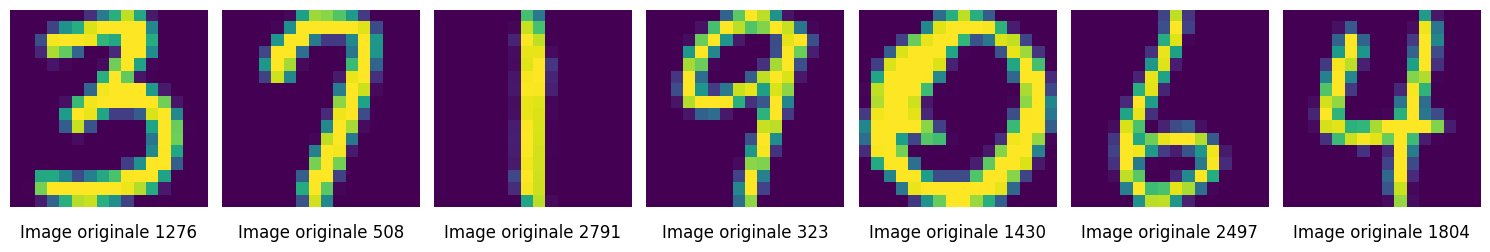

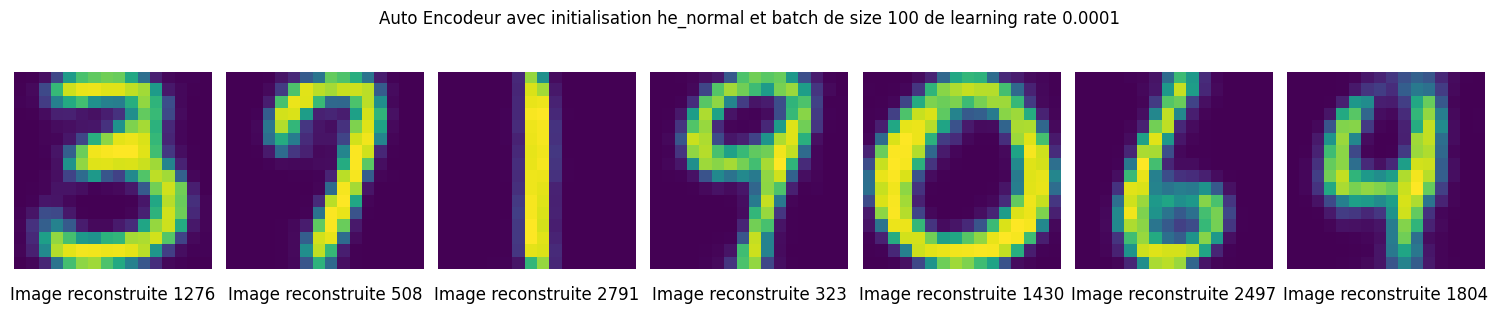

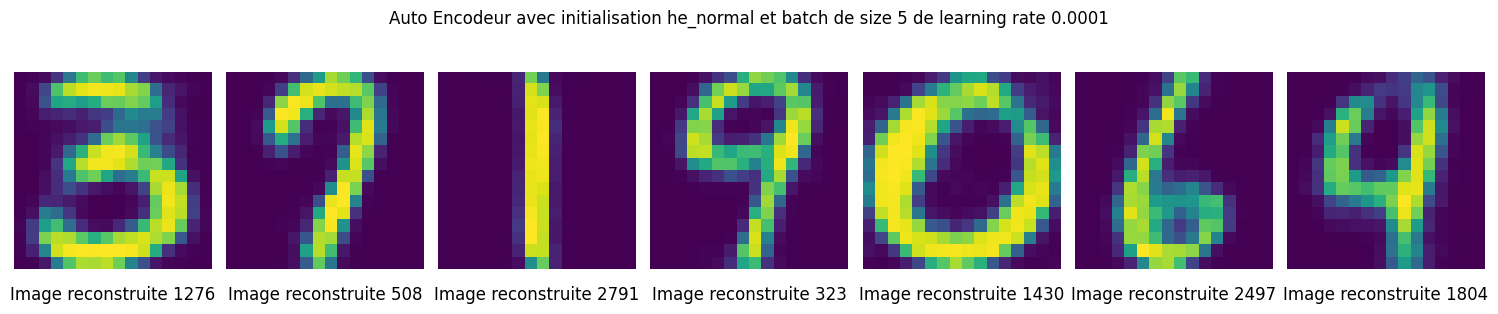

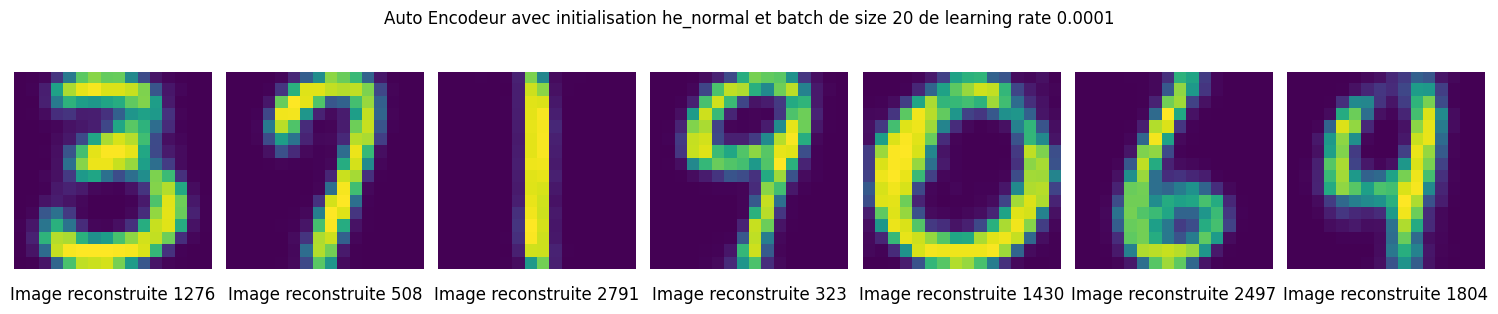

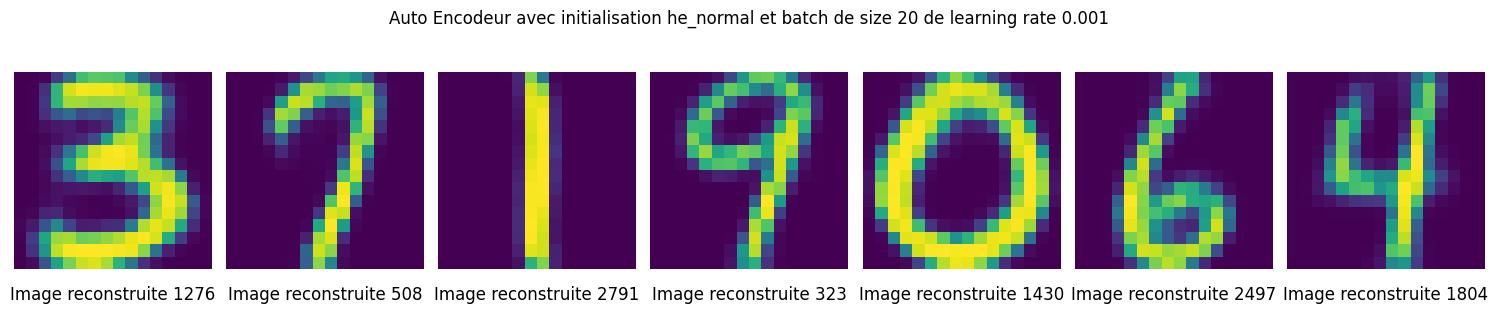

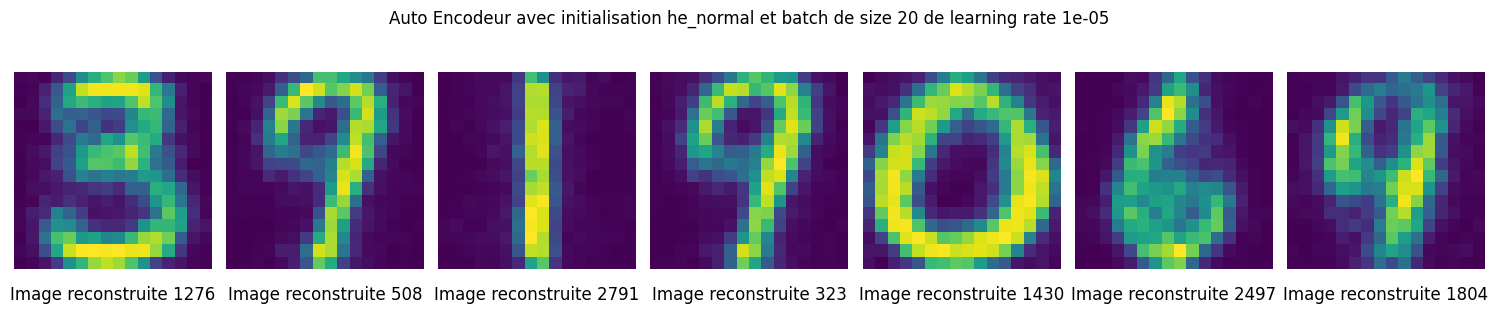

In [6]:
indices = [1276, 508, 2791, 323, 1430, 2497, 1804]
    
plot_usps_predictions(X_test, indices)

i=0

for param, optim in zip(params, optims):
    # i=i+1
    # if i==1 or i==2:
    #     continue
    net = optim.net
    a = param["init"]
    b = param["batch_size"]
    c = param["learning_rate"]

    Xhat = net(X_test)
#     Xhat = net(X_train)
    

    # print(f"Size of Xhat: {Xhat.shape}")
    # print(f"indices: {indices}")


    plot_usps_predictions(Xhat, indices, originale=False, title=f"Auto Encodeur avec initialisation {a} et batch de size {b} de learning rate {c}")

In [7]:
print(Xhat.shape)

(3069, 256)


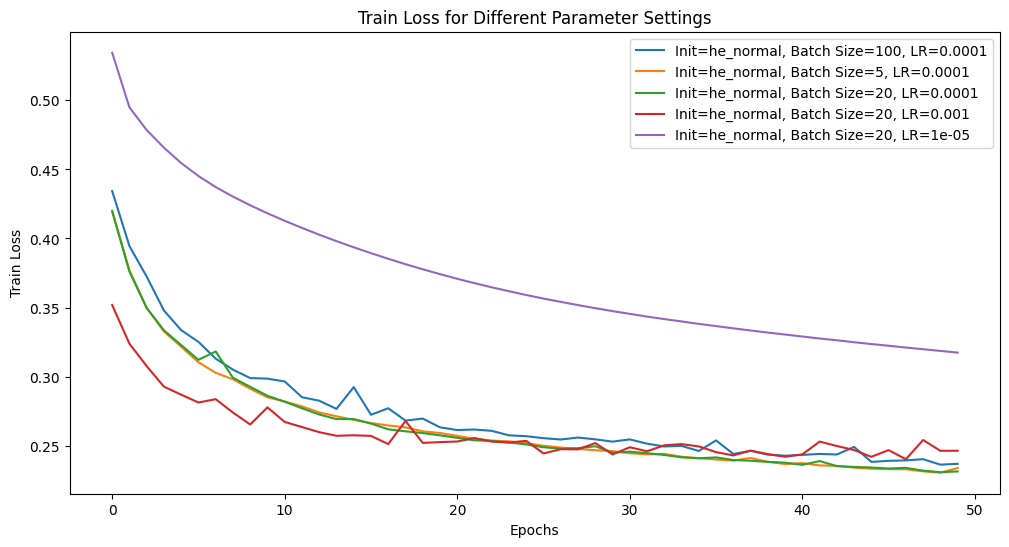

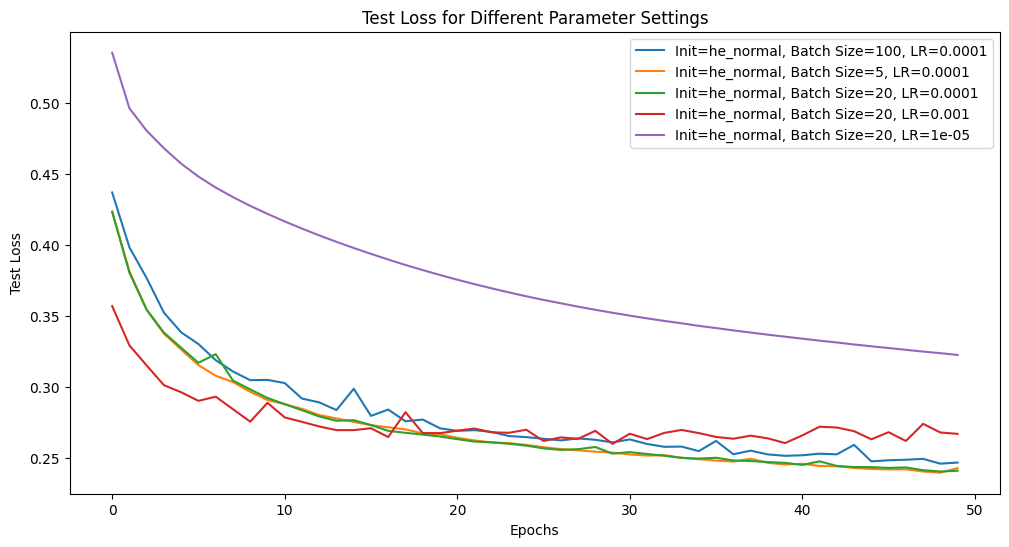

In [34]:
# Plot train loss for different parameter settings
plt.figure(figsize=(12, 6))
for result in results:
    plt.plot(result['train_loss'], label=f"Init={result['init']}, Batch Size={result['batch_size']}, LR={result['learning_rate']}")
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Train Loss for Different Parameter Settings')
plt.legend()
plt.show()

# Plot test loss for different parameter settings
plt.figure(figsize=(12, 6))
for result in results:
    plt.plot(result['test_loss'], label=f"Init={result['init']}, Batch Size={result['batch_size']}, LR={result['learning_rate']}")
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss for Different Parameter Settings')
plt.legend()
plt.show()

In [36]:
input_neurons = 256
h1 = 160
h2 = 120
h3 = 60
h4 = 10

init = "he_normal"
batch_size = 20

encoder = [
    Linear(input_neurons, h1, bias=True, type=init),
    TanH(),
    Linear(h1, h2, bias=True, type=init),
    TanH(),
    Linear(h2, h3, bias=True, type=init),
    TanH(),
    Linear(h3, h4, bias=True, type=init),
    TanH()
]

decoder = [
    Linear(h4, h3, bias=True, type=init),
    TanH(),
    Linear(h3, h2, bias=True, type=init),
    TanH(),
    Linear(h2, h1, bias=True, type=init),
    TanH(),
    Linear(h1, input_neurons, bias=True, type=init),
    Sigmoid()
]
net = Sequential([*encoder, *decoder])

optim = Optim(net, BCELoss(), eps=1e-4)
optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=100, verbose=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Training completed.


  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


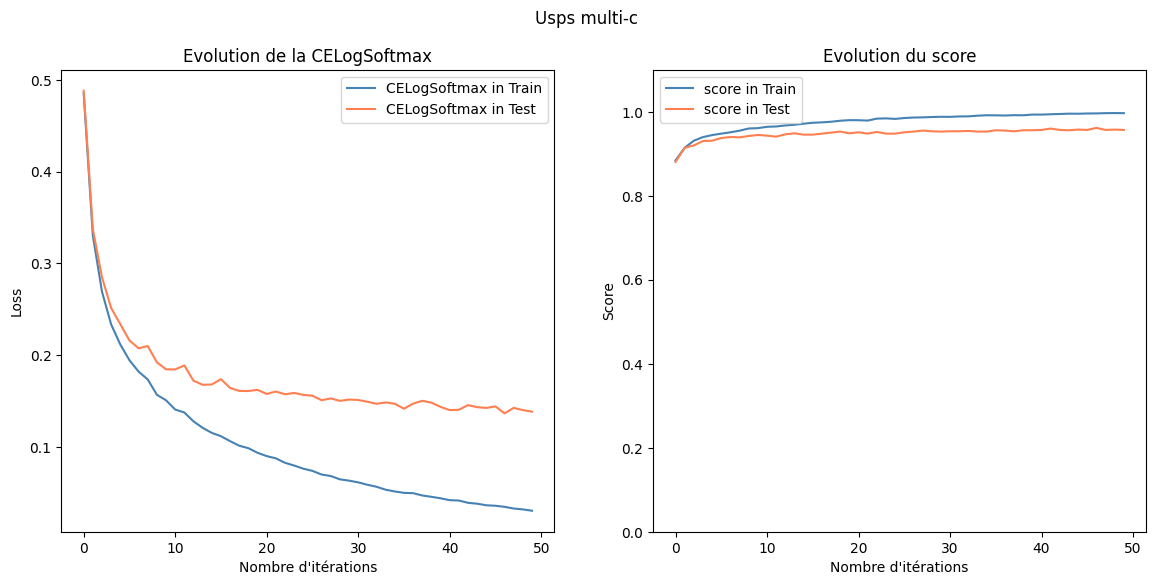

In [37]:
classes = len(np.unique(y_train))

input_neurons = X_train.shape[1]
output_neurons = classes

y_one_hot = one_hot_y(y_train, classes)

hidden_neurons_1 = 100
hidden_neurons_2 = 80

net_classif = Sequential([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
], classes_type="multi")

optim_classif = Optim(net_classif, CELogSoftmax(), eps=1e-3)
optim_classif.SGD(X_train, y_one_hot, test_train_split=True, batch_size=50, epochs=50, verbose=False)

plot_net(optim_classif, X_train, y_one_hot, net_type="multiclass", net_title="Usps multi-c")

In [48]:
Xhat_train = net(X_train)
Xhat = net(X_test)
print("Accuracy on X_train reconstrcuted :", optim_classif.net.score(Xhat_train, y_train))
print("Accuracy on X_test reconstrcuted :", optim_classif.net.score(Xhat, y_test))


Accuracy on X_train reconstrcuted : 0.9444533633006903
Accuracy on X_test reconstrcuted : 0.9260345389377648


In [50]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
def visualization(X_train, Xhat, y_train, type_affichage="tsne", n_components=2,test=False):
    if test is not True:
        x_print = 'X_train'
    else:
        x_print = 'X_test'
    if type_affichage == "tsne":
        tsne = TSNE(n_components=n_components, random_state=0)
        aff_train = tsne.fit_transform(X_train)

        tsne = TSNE(n_components=n_components, random_state=0)
        aff_hat = tsne.fit_transform(Xhat)

    if type_affichage == "pca":
        tsne = PCA(n_components=n_components, random_state=0)
        aff_train = tsne.fit_transform(X_train)

        tsne = PCA(n_components=n_components, random_state=0)
        aff_hat = tsne.fit_transform(Xhat)

    if n_components == 2:
        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(121)
        ax1.scatter(aff_train[:, 0], aff_train[:, 1], c=y_train)
        ax1.set_xlabel("Dimension 1")
        ax1.set_ylabel("Dimension 2")
        ax1.set_title(type_affichage.upper() + f" Visualization for {x_print}")
        ax2 = fig.add_subplot(122)
        ax2.scatter(aff_hat[:, 0], aff_hat[:, 1], c=y_train)
        ax2.set_xlabel("Dimension 1")
        ax2.set_ylabel("Dimension 2")
        ax2.set_title(type_affichage.upper() + " Visualization for Xhat")

    if n_components == 3:
        fig = plt.figure(figsize=(12, 12))
        ax1 = fig.add_subplot(121, projection="3d")
        ax1.scatter(aff_train[:, 0], aff_train[:, 1], aff_train[:, 2], c=y_train)
        ax1.set_xlabel("Dimension 1")
        ax1.set_ylabel("Dimension 2")
        ax1.set_zlabel("Dimension 3")
        ax1.set_title(type_affichage.upper() + f" Visualization in 3D for {x_print}")

        ax2 = fig.add_subplot(122, projection="3d")
        ax2.scatter(aff_hat[:, 0], aff_hat[:, 1], aff_hat[:, 2], c=y_train)
        ax2.set_xlabel("Dimension 1")
        ax2.set_ylabel("Dimension 2")
        ax2.set_zlabel("Dimension 3")
        ax2.set_title(type_affichage.upper() + " Visualization in 3D for Xhat")

    plt.tight_layout()
    plt.show()

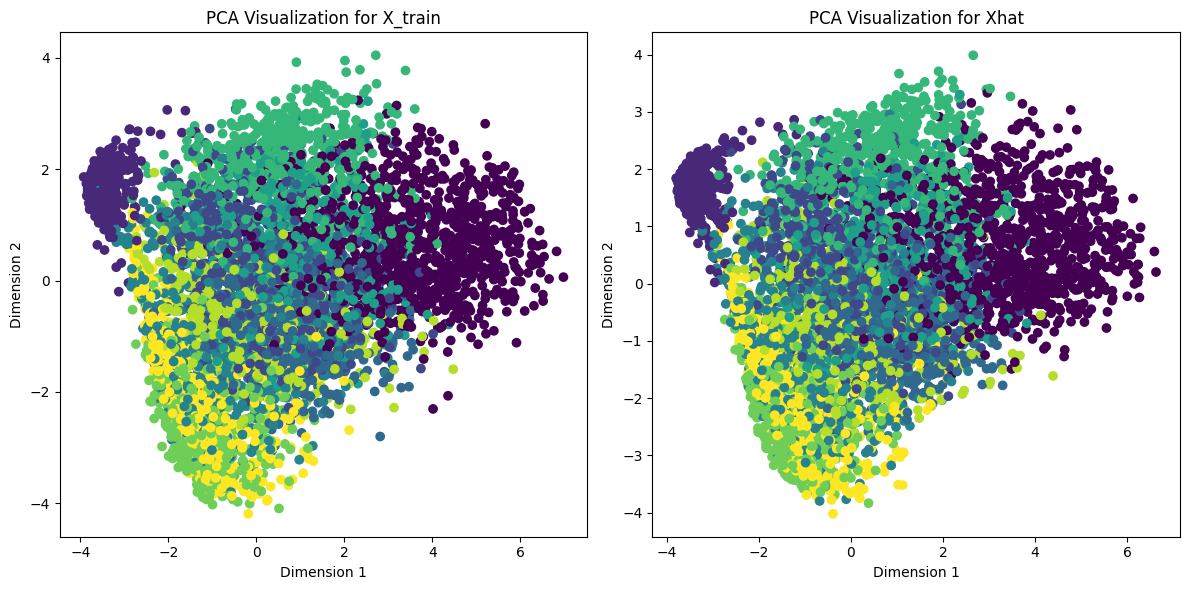

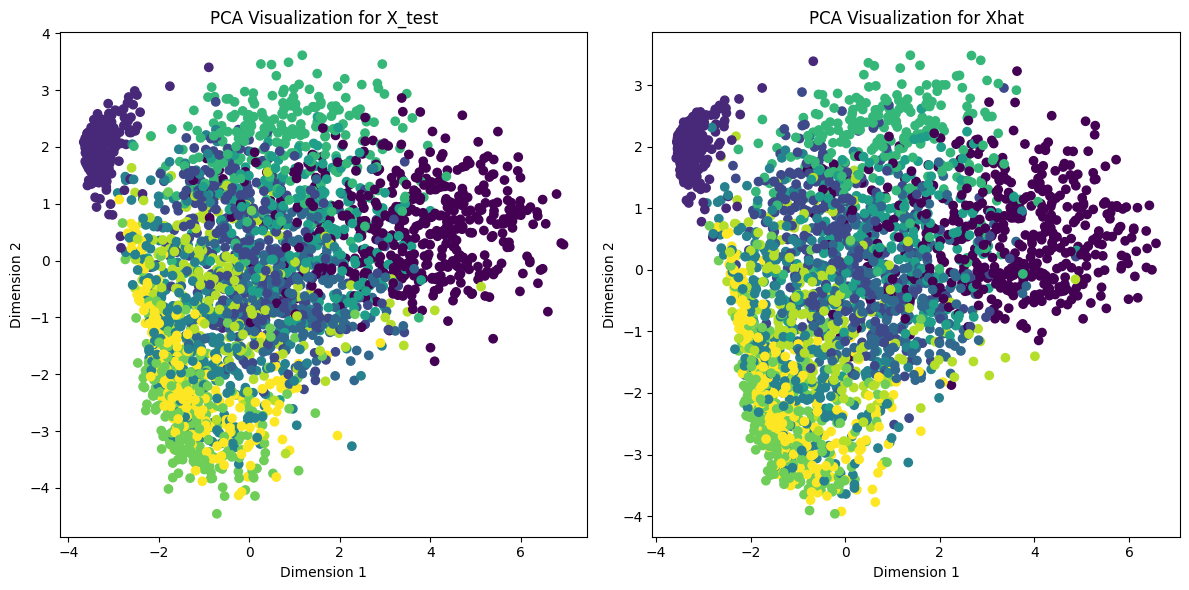

In [52]:
visualization(X_train, Xhat_train, y_train, type_affichage="pca")
visualization(X_test, Xhat, y_test, type_affichage="pca",test=True)

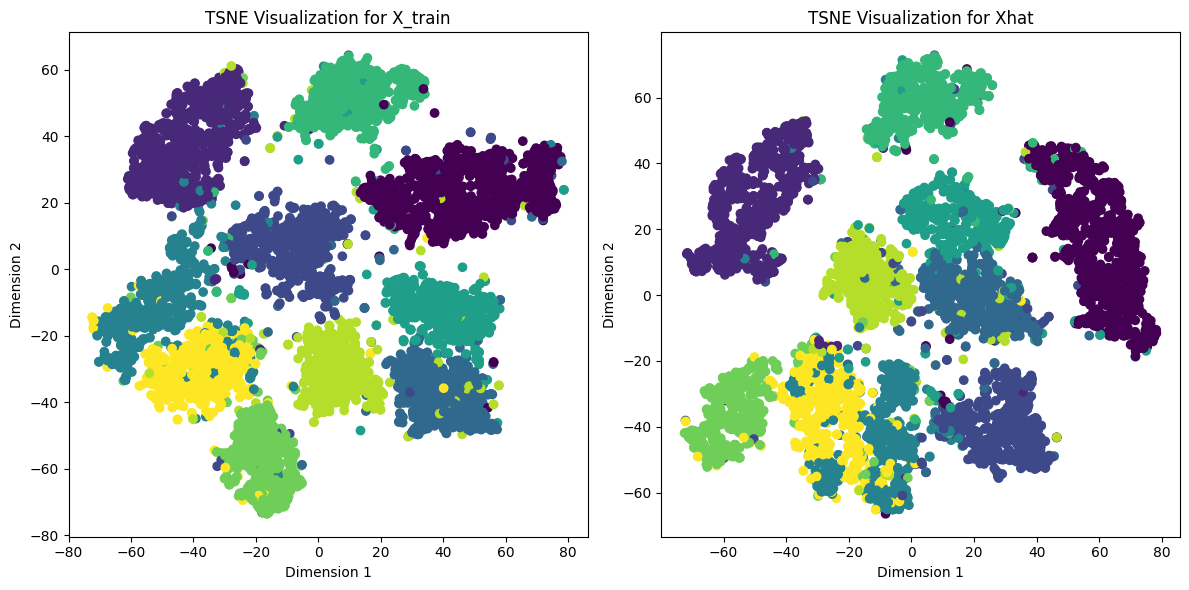

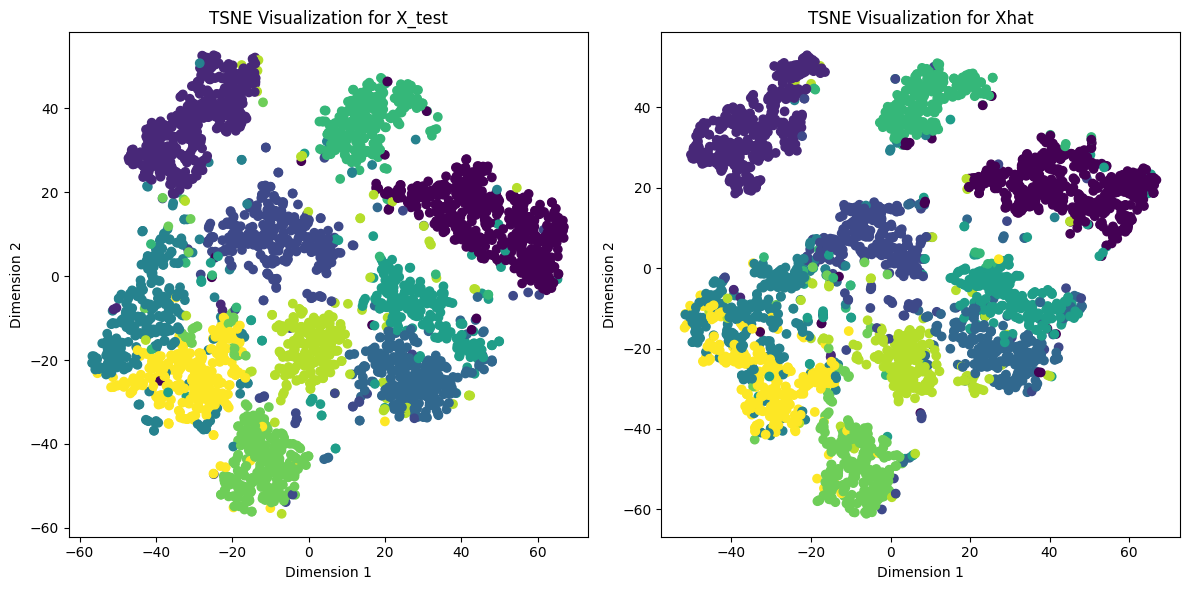

In [53]:
visualization(X_train, Xhat_train, y_train, type_affichage="tsne")
visualization(X_test, Xhat, y_test, type_affichage="tsne",test=True)

### enconding + kmeans

In [54]:
encoder_net = Sequential(encoder)
x_encoder = encoder_net(X_train)

kmeans = KMeans(n_clusters=10, random_state=0)

labels = kmeans.fit_predict(x_encoder)
tsne = TSNE(n_components=2, random_state=0)
aff_enc = tsne.fit_transform(x_encoder)

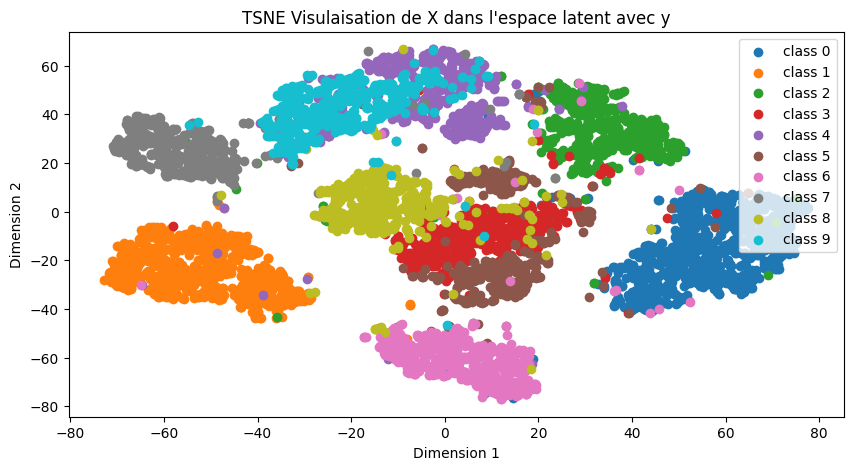

In [55]:
colors = {i: plt.cm.tab10(i) for i in range(10)}

plt.figure(figsize=(10, 5))
for cl in range(10):
    plt.scatter(aff_enc[y_train == cl][:, 0], aff_enc[y_train == cl][:, 1], color=colors[cl], label=f"class {cl}")
    
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("TSNE Visulaisation de X dans l'espace latent avec y")
plt.legend()
plt.show()

In [60]:
# 聚类性能评估
def get_cluster_labels(labels, y):
    cluster_labels = np.zeros_like(labels)
    for i in range(10):
        mask = (labels == i)
        cluster_labels[mask] = np.bincount(y[mask]).argmax()
    return cluster_labels

cluster_labels = get_cluster_labels(labels, y_train)
accuracy = accuracy_score(y_train, cluster_labels)
precision = precision_score(y_train, cluster_labels, average='macro')
recall = recall_score(y_train, cluster_labels, average='macro')
f1 = f1_score(y_train, cluster_labels, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7603
Precision: 0.6821
Recall: 0.7192
F1 Score: 0.6961


/Users/tian/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Bruiter + debruiter

In [61]:
# Charger les données
data = pkl.load(open("data/usps.pkl",'rb'))
X_train = data["X_train"]
y_train = data["Y_train"]
X_test = data["X_test"]
y_test = data["Y_test"]

# Normaliser les données
X_train = (X_train - X_train.min(axis=1, keepdims=True)) / (X_train.max(axis=1, keepdims=True) - X_train.min(axis=1, keepdims=True))
X_test = (X_test - X_test.min(axis=1, keepdims=True)) / (X_test.max(axis=1, keepdims=True) - X_test.min(axis=1, keepdims=True))


  0%|          | 0/150 [00:00<?, ?it/s]

Training completed.


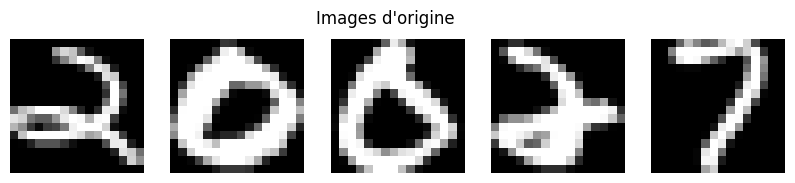

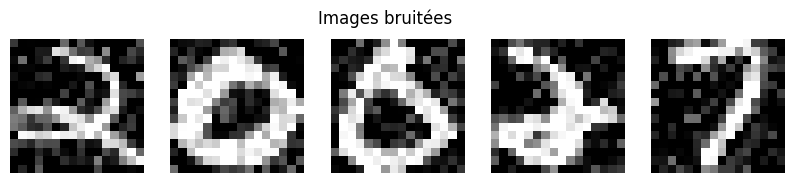

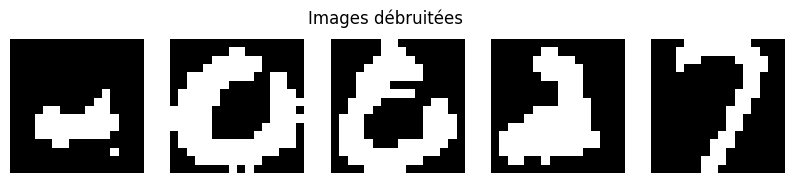

In [62]:

# Définir les dimensions
input_neurons = 256
h1 = 160
h2 = 120
h3 = 60
h4 = 10

# Initialisation et configuration de l'autoencodeur
init = "he_normal"
batch_size = 20

encoder = [
    Linear(input_neurons, h1, bias=True, type=init),
    TanH(),
    Linear(h1, h2, bias=True, type=init),
    TanH(),
    Linear(h2, h3, bias=True, type=init),
    TanH(),
    Linear(h3, h4, bias=True, type=init),
    TanH()
]

decoder = [
    Linear(h4, h3, bias=True, type=init),
    TanH(),
    Linear(h3, h2, bias=True, type=init),
    TanH(),
    Linear(h2, h1, bias=True, type=init),
    TanH(),
    Linear(h1, input_neurons, bias=True, type=init),
    Sigmoid()
]

# Créer le réseau autoencodeur
net = Sequential([*encoder, *decoder])

# Entraîner l'autoencodeur
optim = Optim(net, BCELoss(), eps=1e-4)
optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=150, verbose=False)

# Débruitage des images de test
def denoise_images(images, autoencoder):
    denoised_images = autoencoder.predict(images)
    return denoised_images

# Générer des images bruitées
def add_noise(images, noise_factor=0.1):
    noisy_images = images + noise_factor * np.random.normal(size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Débruitage des images de test bruitées
noise_factor = 0.2  # Ajuster le facteur de bruit selon vos besoins
noisy_X_test = add_noise(X_test, noise_factor)
denoised_X_test = denoise_images(noisy_X_test, net)

# Visualisation des images d'origine, bruitées et débruitées
import matplotlib.pyplot as plt

def plot_images(images, title):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape(16, 16), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(X_test, "Images d'origine")
plot_images(noisy_X_test, "Images bruitées")
plot_images(denoised_X_test, "Images débruitées")


In [63]:
# Check the accuracy on the training set
train_predictions = optim_classif.net.predict(X_train)
train_predicted_classes = np.argmax(train_predictions, axis=1)
train_accuracy = np.mean(train_predicted_classes == y_train)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.1709744742334243


TSNE

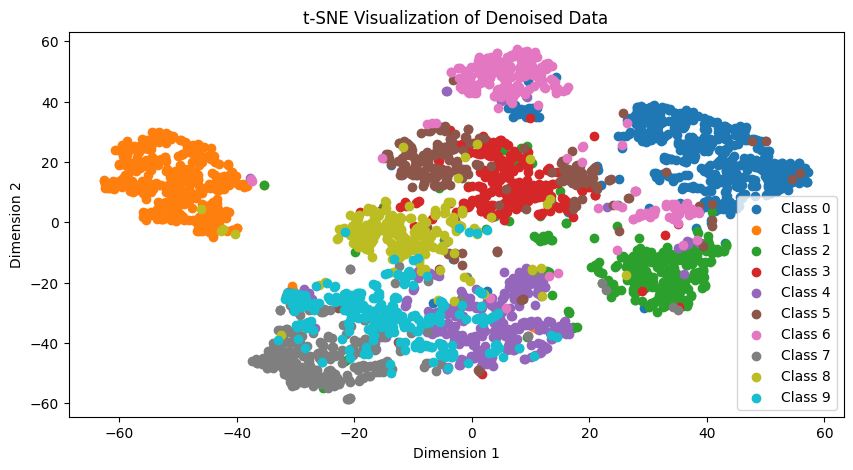

In [64]:
from sklearn.manifold import TSNE

# Encode the test data using the encoder part of the autoencoder
encoder_net = Sequential(encoder)
encoded_X_test = encoder_net(X_test)

# Apply t-SNE to the encoded test data
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(encoded_X_test)

# Plot the t-SNE results
plt.figure(figsize=(10, 5))
for i in range(10):
    indices = (y_test == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f"Class {i}")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Visualization of Denoised Data")
plt.legend()
plt.show()


PCA

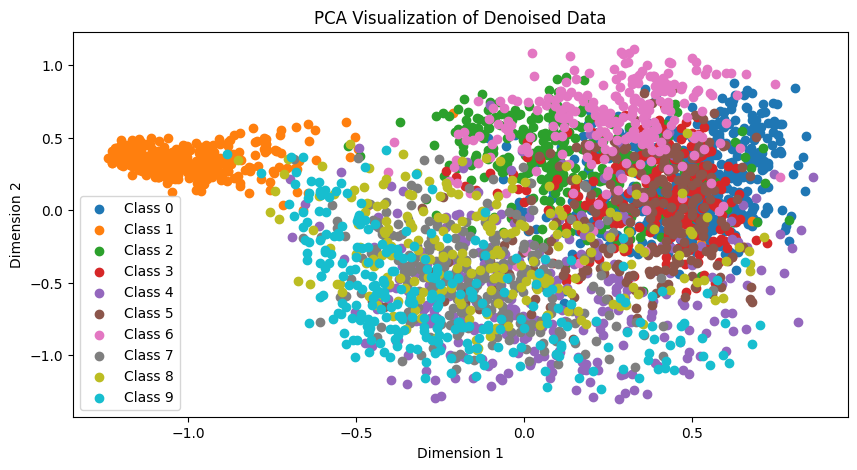

In [65]:
from sklearn.decomposition import PCA

# Apply PCA to the encoded test data
pca = PCA(n_components=2, random_state=0)
pca_results = pca.fit_transform(encoded_X_test)

# Plot the PCA results
plt.figure(figsize=(10, 5))
for i in range(10):
    indices = (y_test == i)
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1], label=f"Class {i}")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("PCA Visualization of Denoised Data")
plt.legend()
plt.show()


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 - Loss: 0.5668579073436806 - Score: 0.0
Epoch 2/200 - Loss: 0.46820681494581595 - Score: 0.0
Epoch 3/200 - Loss: 0.4517030486110077 - Score: 0.0
Epoch 4/200 - Loss: 0.4435222107470769 - Score: 0.0
Epoch 5/200 - Loss: 0.4371678386725362 - Score: 0.0
Epoch 6/200 - Loss: 0.4317375488584542 - Score: 0.0
Epoch 7/200 - Loss: 0.4278429284861102 - Score: 0.0
Epoch 8/200 - Loss: 0.4227685568175686 - Score: 0.0
Epoch 9/200 - Loss: 0.4185683459030309 - Score: 0.0
Epoch 10/200 - Loss: 0.4147887692940951 - Score: 0.0
Epoch 11/200 - Loss: 0.4108223432842053 - Score: 0.0
Epoch 12/200 - Loss: 0.4071409889348481 - Score: 0.0
Epoch 13/200 - Loss: 0.4044257092723398 - Score: 0.0
Epoch 14/200 - Loss: 0.40103672701624765 - Score: 0.0
Epoch 15/200 - Loss: 0.39730090873292634 - Score: 0.0
Epoch 16/200 - Loss: 0.39431137799616217 - Score: 0.0
Epoch 17/200 - Loss: 0.39066782453378335 - Score: 0.0
Epoch 18/200 - Loss: 0.3876611408033594 - Score: 0.0
Epoch 19/200 - Loss: 0.3864028330050625 - Score: 0

Epoch 154/200 - Loss: 0.2896856517421096 - Score: 0.0
Epoch 155/200 - Loss: 0.29228886061615367 - Score: 0.0
Epoch 156/200 - Loss: 0.29417130819782394 - Score: 0.0
Epoch 157/200 - Loss: 0.28946244254014925 - Score: 0.0
Epoch 158/200 - Loss: 0.291133891801446 - Score: 0.0
Epoch 159/200 - Loss: 0.29356805580839784 - Score: 0.0
Epoch 160/200 - Loss: 0.28959717388870565 - Score: 0.0
Epoch 161/200 - Loss: 0.2915918223506946 - Score: 0.0
Epoch 162/200 - Loss: 0.2920703535571899 - Score: 0.0
Epoch 163/200 - Loss: 0.2892901207989508 - Score: 0.0
Epoch 164/200 - Loss: 0.28739919738558845 - Score: 0.0
Epoch 165/200 - Loss: 0.28999329152661873 - Score: 0.0
Epoch 166/200 - Loss: 0.29066285122305646 - Score: 0.0
Epoch 167/200 - Loss: 0.2870300734532848 - Score: 0.0
Epoch 168/200 - Loss: 0.28961070087186547 - Score: 0.0
Epoch 169/200 - Loss: 0.2894528994708586 - Score: 0.0
Epoch 170/200 - Loss: 0.2885767091427753 - Score: 0.0
Epoch 171/200 - Loss: 0.287075482461006 - Score: 0.0
Epoch 172/200 - Loss:

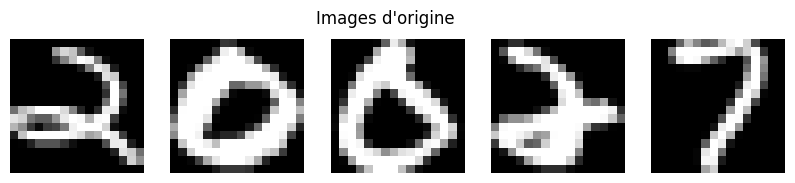

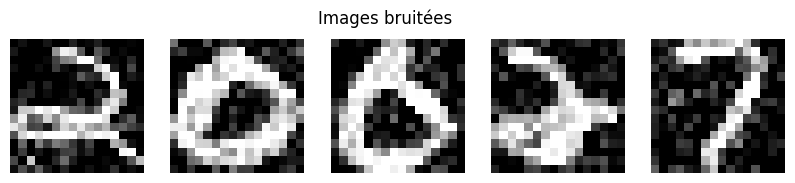

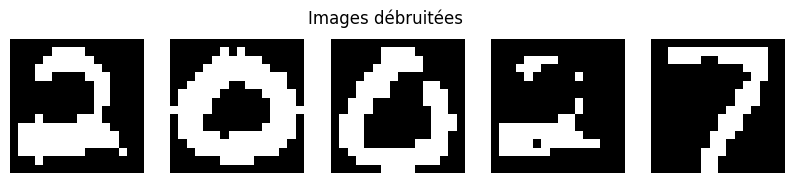

(3188, 10)


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 - Loss: 0.6001875439937593 - Score: 0.8213166144200627
Epoch 2/200 - Loss: 0.4204185886909295 - Score: 0.8761755485893417
Epoch 3/200 - Loss: 0.2853431267456599 - Score: 0.877742946708464
Epoch 4/200 - Loss: 0.2188764727905414 - Score: 0.9184952978056427
Epoch 5/200 - Loss: 0.17963450028304018 - Score: 0.9278996865203761
Epoch 6/200 - Loss: 0.1621111796766102 - Score: 0.9310344827586207
Epoch 7/200 - Loss: 0.15072569141187198 - Score: 0.9310344827586207
Epoch 8/200 - Loss: 0.1328260084984743 - Score: 0.945141065830721
Epoch 9/200 - Loss: 0.0974505970232573 - Score: 0.9435736677115988
Epoch 10/200 - Loss: 0.08943036569280784 - Score: 0.9373040752351097
Epoch 11/200 - Loss: 0.07782850881873665 - Score: 0.9404388714733543
Epoch 12/200 - Loss: 0.07967314557408783 - Score: 0.9310344827586207
Epoch 13/200 - Loss: 0.0696484211688836 - Score: 0.9357366771159875
Epoch 14/200 - Loss: 0.054507793176224624 - Score: 0.9404388714733543
Epoch 15/200 - Loss: 0.04861941156246876 - Score: 0.

Epoch 119/200 - Loss: 0.0023476624799824205 - Score: 0.9498432601880877
Epoch 120/200 - Loss: 0.0020956403249334584 - Score: 0.9529780564263323
Epoch 121/200 - Loss: 0.0020993370412275883 - Score: 0.9498432601880877
Epoch 122/200 - Loss: 0.002052313537983053 - Score: 0.95141065830721
Epoch 123/200 - Loss: 0.0022378611701223063 - Score: 0.9498432601880877
Epoch 124/200 - Loss: 0.0021143353372472633 - Score: 0.9529780564263323
Epoch 125/200 - Loss: 0.001998053380826872 - Score: 0.9498432601880877
Epoch 126/200 - Loss: 0.001987908658718874 - Score: 0.9498432601880877
Epoch 127/200 - Loss: 0.0020704643897430574 - Score: 0.9498432601880877
Epoch 128/200 - Loss: 0.0020166096636329467 - Score: 0.9498432601880877
Epoch 129/200 - Loss: 0.002080105443142763 - Score: 0.9498432601880877
Epoch 130/200 - Loss: 0.002050362966229899 - Score: 0.95141065830721
Epoch 131/200 - Loss: 0.002043695282026497 - Score: 0.9498432601880877
Epoch 132/200 - Loss: 0.0018613890157246117 - Score: 0.9498432601880877
Ep

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Split a validation set from the training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define dimensions
input_neurons = 256
h1 = 300
h2 = 200
h3 = 100
h4 = 50
h5 = 10


init = "he_normal"
batch_size = 50

encoder = [
    Linear(input_neurons, h1, bias=True, type=init),
    ReLU(),
    
    Linear(h1, h2, bias=True, type=init),
    ReLU(),
    
    Linear(h2, h3, bias=True, type=init),
    ReLU(),
    
    Linear(h3, h4, bias=True, type=init),
    ReLU(),
    
    Linear(h4, h5, bias=True, type=init),
    ReLU()
]

decoder = [
    Linear(h5, h4, bias=True, type=init),
    ReLU(),
    
    Linear(h4, h3, bias=True, type=init),
    ReLU(),
    
    Linear(h3, h2, bias=True, type=init),
    ReLU(),
    
    Linear(h2, h1, bias=True, type=init),
    ReLU(),
    
    Linear(h1, input_neurons, bias=True, type=init),
    Sigmoid()
]

# Create the autoencoder
net = Sequential([*encoder, *decoder])

# Train the autoencoder
optim = Optim(net, BCELoss(), eps=1e-5)
optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=200, verbose=True)

# Denoise images
def denoise_images(images, autoencoder):
    denoised_images = autoencoder.predict(images)
    return denoised_images

# Add noise to images
def add_noise(images, noise_factor=0.1):
    noisy_images = images + noise_factor * np.random.normal(size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Denoise test images
noise_factor = 0.2
noisy_X_test = add_noise(X_test, noise_factor)
denoised_X_test = denoise_images(noisy_X_test, net)

# Visualize images
def plot_images(images, title):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape(16, 16), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(X_test, "Images d'origine")
plot_images(noisy_X_test, "Images bruitées")
plot_images(denoised_X_test, "Images débruitées")

# One-hot encode labels
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

classes = len(np.unique(y_train))
y_train_one_hot = one_hot_encode(y_train, classes)
print(y_train_one_hot.shape)
y_val_one_hot = one_hot_encode(y_val, classes)
y_test_one_hot = one_hot_encode(y_test, classes)

# Classifier architecture with dropout for regularization
hidden_neurons_1 = 200
hidden_neurons_2 = 150
hidden_neurons_3 = 100
output_neurons = classes

net_classif = Sequential([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    ReLU(),
    
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    ReLU(),
    
    Linear(hidden_neurons_2, hidden_neurons_3, bias=True),
    ReLU(),
    
    Linear(hidden_neurons_3, output_neurons, bias=True),
], classes_type="multi")

# Train classifier
optim_classif = Optim(net_classif, CELogSoftmax(), eps=1e-3)
optim_classif.SGD(X_train, y_train_one_hot, test_train_split=True, batch_size=64, epochs=200, verbose=True)

# Evaluate on validation set



In [76]:
print(y_train_one_hot.shape)


(4983, 10)


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 - Loss: 8.7251886164191e-05 - Score: 1.0
Epoch 2/200 - Loss: 8.60715467472856e-05 - Score: 1.0
Epoch 3/200 - Loss: 8.590989936468116e-05 - Score: 1.0
Epoch 4/200 - Loss: 8.505664112621934e-05 - Score: 1.0
Epoch 5/200 - Loss: 8.494885597239191e-05 - Score: 1.0
Epoch 6/200 - Loss: 8.524847243816527e-05 - Score: 1.0
Epoch 7/200 - Loss: 8.457604077113079e-05 - Score: 1.0
Epoch 8/200 - Loss: 8.45256708015617e-05 - Score: 1.0
Epoch 9/200 - Loss: 8.429617988359564e-05 - Score: 1.0
Epoch 10/200 - Loss: 8.397824226577896e-05 - Score: 1.0
Epoch 11/200 - Loss: 8.492113253993238e-05 - Score: 1.0
Epoch 12/200 - Loss: 8.569948134345229e-05 - Score: 1.0
Epoch 13/200 - Loss: 8.276431368213561e-05 - Score: 1.0
Epoch 14/200 - Loss: 8.649359868402327e-05 - Score: 1.0
Epoch 15/200 - Loss: 8.252596147768362e-05 - Score: 1.0
Epoch 16/200 - Loss: 8.236588882390722e-05 - Score: 1.0
Epoch 17/200 - Loss: 8.263519355568665e-05 - Score: 1.0
Epoch 18/200 - Loss: 8.229323558201485e-05 - Score: 1.0
Epoch

Epoch 149/200 - Loss: 6.848400637012215e-05 - Score: 1.0
Epoch 150/200 - Loss: 6.709514401836518e-05 - Score: 1.0
Epoch 151/200 - Loss: 6.79600458746435e-05 - Score: 1.0
Epoch 152/200 - Loss: 6.709052955172458e-05 - Score: 1.0
Epoch 153/200 - Loss: 6.78993865398439e-05 - Score: 1.0
Epoch 154/200 - Loss: 6.736999018598153e-05 - Score: 1.0
Epoch 155/200 - Loss: 6.757608651274981e-05 - Score: 1.0
Epoch 156/200 - Loss: 6.612651297213165e-05 - Score: 1.0
Epoch 157/200 - Loss: 6.610529475142511e-05 - Score: 1.0
Epoch 158/200 - Loss: 6.672646932207824e-05 - Score: 1.0
Epoch 159/200 - Loss: 6.591339245304293e-05 - Score: 1.0
Epoch 160/200 - Loss: 6.598088867835247e-05 - Score: 1.0
Epoch 161/200 - Loss: 6.774122172690915e-05 - Score: 1.0
Epoch 162/200 - Loss: 6.641483432557234e-05 - Score: 1.0
Epoch 163/200 - Loss: 6.579192733533136e-05 - Score: 1.0
Epoch 164/200 - Loss: 6.57193603523254e-05 - Score: 1.0
Epoch 165/200 - Loss: 6.875051295907878e-05 - Score: 1.0
Epoch 166/200 - Loss: 6.5566662406

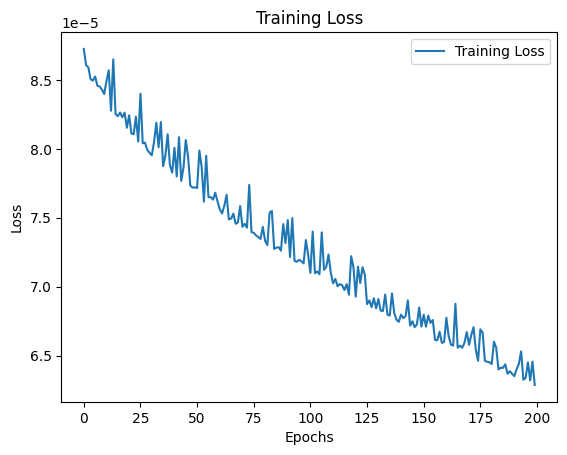

Training Accuracy: 0.10796111988337696
Validation Accuracy: 0.11038561315569625


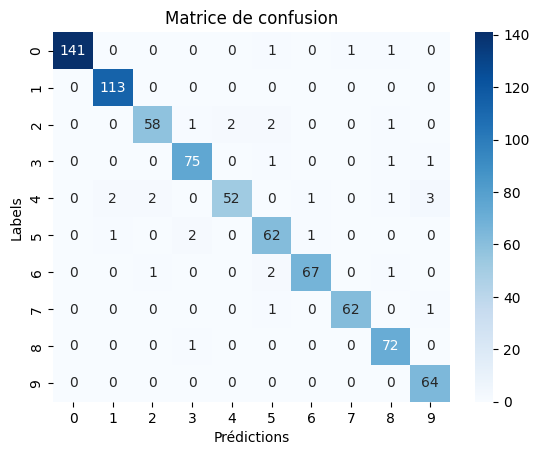

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the training accuracy
def calculate_accuracy(predictions, true_labels):
    true_labels = np.argmax(true_labels, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy

# Train classifier
optim_classif = Optim(net_classif, CELogSoftmax(), eps=1e-3)
optim_classif.SGD(X_train, y_train_one_hot, test_train_split=True, batch_size=64, epochs=200, verbose=True)

# Plot the training loss
plt.plot(optim_classif.train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Calculate the training accuracy
train_predictions = net_classif.predict(X_train)
train_accuracy = calculate_accuracy(train_predictions, y_train_one_hot)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the validation set
val_predictions = net_classif.predict(X_val)
val_accuracy = calculate_accuracy(val_predictions, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy}")

# Confusion matrix for validation set
y_val_one_hot_1ax = np.argmax(y_val_one_hot, axis=1)
val_predictions_flatten = val_predictions.reshape(-1)

df = classification_report(y_val_one_hot_1ax, val_predictions_flatten, [f"{i}" for i in range(10)])


Validation Accuracy: 0.9598997493734336
Test Accuracy: 0.9442815249266863


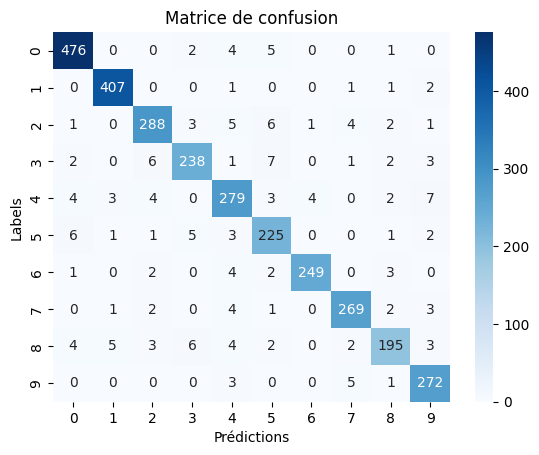

In [103]:
val_predictions = optim_classif.net.predict(X_val)
val_predictions = val_predictions.reshape(-1)
val_accuracy = np.mean(val_predictions == y_val_one_hot_1ax)
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on test set
test_predictions = optim_classif.net.predict(X_test)
test_predictions = test_predictions.reshape(-1)

y_test_one_hot_1ax = np.argmax(y_test_one_hot, axis=1)
test_accuracy = np.mean(test_predictions == y_test_one_hot_1ax)
print(f"Test Accuracy: {test_accuracy}")
# Confusion matrix
df = classification_report(y_test_one_hot_1ax, test_predictions, [f"{i}" for i in range(10)])

KMEANS

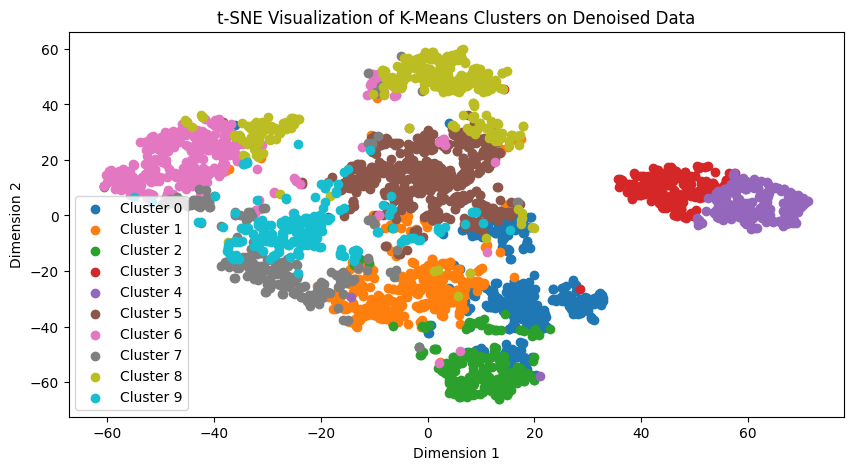

In [22]:
from sklearn.cluster import KMeans

# Apply K-Means clustering on the encoded test data
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_labels = kmeans.fit_predict(encoded_X_test)

# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(encoded_X_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    indices = (kmeans_labels == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f"Cluster {i}")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Visualization of K-Means Clusters on Denoised Data")
plt.legend()
plt.show()
